<h1>Install Required Libraries</h1>

In [2]:

%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer


<h1>Preparing the data</h1>

In [5]:
train_df = pd.read_csv('train.csv')

In [6]:
test_df = pd.read_csv('test.csv')

In [7]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


<h1>Preprocessing the data</h1>

In [10]:
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

In [11]:
# Checking for missing values
missing_values_train = X.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0] 
missing_values_train

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
# Find numerical columns so we can fill it with mean
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [13]:
# Filling with mean
simple_imputer = SimpleImputer(strategy='mean')
X[numerical_columns] = simple_imputer.fit_transform(X[numerical_columns])
test_df[numerical_columns] = simple_imputer.transform(test_df[numerical_columns])
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20.0,RH,80.0,11622.0,Pave,NaN,Reg,Lvl,AllPub,...,120.0,0.0,NaN,MnPrv,NaN,0.0,6.0,2010.0,WD,Normal
1,1462.0,20.0,RL,81.0,14267.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,NaN,Gar2,12500.0,6.0,2010.0,WD,Normal
2,1463.0,60.0,RL,74.0,13830.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,MnPrv,NaN,0.0,3.0,2010.0,WD,Normal
3,1464.0,60.0,RL,78.0,9978.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2010.0,WD,Normal
4,1465.0,120.0,RL,43.0,5005.0,Pave,NaN,IR1,HLS,AllPub,...,144.0,0.0,NaN,NaN,NaN,0.0,1.0,2010.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,RM,21.0,1936.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2006.0,WD,Normal
1455,2916.0,160.0,RM,21.0,1894.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,4.0,2006.0,WD,Abnorml
1456,2917.0,20.0,RL,160.0,20000.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2006.0,WD,Abnorml
1457,2918.0,85.0,RL,62.0,10441.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,MnPrv,Shed,700.0,7.0,2006.0,WD,Normal


In [14]:
# Find categorical columns so we can fill it with most frequent
categorical_columns = X.select_dtypes(include=['object']).columns
simple_imputer_categorical = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = simple_imputer_categorical.fit_transform(X[categorical_columns])
test_df[categorical_columns] = simple_imputer_categorical.transform(test_df[categorical_columns])
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20.0,RH,80.0,11622.0,Pave,Grvl,Reg,Lvl,AllPub,...,120.0,0.0,Gd,MnPrv,Shed,0.0,6.0,2010.0,WD,Normal
1,1462.0,20.0,RL,81.0,14267.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,0.0,Gd,MnPrv,Gar2,12500.0,6.0,2010.0,WD,Normal
2,1463.0,60.0,RL,74.0,13830.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,0.0,Gd,MnPrv,Shed,0.0,3.0,2010.0,WD,Normal
3,1464.0,60.0,RL,78.0,9978.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,0.0,Gd,MnPrv,Shed,0.0,6.0,2010.0,WD,Normal
4,1465.0,120.0,RL,43.0,5005.0,Pave,Grvl,IR1,HLS,AllPub,...,144.0,0.0,Gd,MnPrv,Shed,0.0,1.0,2010.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,RM,21.0,1936.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,0.0,Gd,MnPrv,Shed,0.0,6.0,2006.0,WD,Normal
1455,2916.0,160.0,RM,21.0,1894.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,0.0,Gd,MnPrv,Shed,0.0,4.0,2006.0,WD,Abnorml
1456,2917.0,20.0,RL,160.0,20000.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,0.0,Gd,MnPrv,Shed,0.0,9.0,2006.0,WD,Abnorml
1457,2918.0,85.0,RL,62.0,10441.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,0.0,Gd,MnPrv,Shed,700.0,7.0,2006.0,WD,Normal


In [15]:
# Now we can use one-hot encoding for the categorical values
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)
test_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,False,False,False,False,True,False,False,False,True,False
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,False,False,False,False,True,False,False,False,True,False
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,False,False,False,False,True,False,False,False,True,False
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,False,False,False,False,True,False,False,False,True,False
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1455,2916.0,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,...,False,False,False,False,True,False,False,False,False,False
1456,2917.0,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,...,False,False,False,False,True,False,False,False,False,False
1457,2918.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,...,False,False,False,False,True,False,False,False,True,False


<h1>Splitting the data for the models</h1>

In [17]:
X, test_df = X.align(test_df, join='left', axis=1, fill_value=0)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



<h1>Experiments</h1>

<h3>Experiment 1: Performance of XGBoost (Primary method)</h3>

In [20]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    n_estimators=200,
    min_child_weight=2,
    subsample=1,
    colsample_bytree=0.8,
    reg_lambda=0.45,
    reg_alpha=0,
    gamma=0.5,
    random_state=42
)
xgb_model.fit(X_train, y_train)
train_predictions = xgb_model.predict(X_train)

val_predictions = xgb_model.predict(X_val)


In [21]:
from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(y_train, train_predictions) ** 0.5
print("Training RMSE:", train_rmse)

val_rmse = mean_squared_error(y_val, val_predictions) ** 0.5
print("Validation/Test RMSE:", val_rmse)

Training RMSE: 2335.4772759457155
Validation/Test RMSE: 26606.04240680065


In [22]:
from sklearn.metrics import mean_squared_log_error

train_predictions[train_predictions < 0] = 0
val_predictions[val_predictions < 0] = 0

train_rmsle = mean_squared_log_error(y_train, train_predictions) ** 0.5
print("Training RMSLE:", train_rmsle)

val_rmsle = mean_squared_log_error(y_val, val_predictions) ** 0.5
print("Validation/Test RMSLE:", val_rmsle)

Training RMSLE: 0.015800503392481836
Validation/Test RMSLE: 0.14494078389961002


<h3>Experiment 1a: Performance of XGBoost with different parameters: Changing Learning Rate</h3>

<h3>Experiment 1b: Performance of XGBoost with different parameters: Changing n_estimators</h3>

<h3>Experiment 1c: Performance of XGBoost with different parameters: Changing max_depth</h3>

<h3>Experiment 1b: Performance of XGBoost with different parameters: Changing max_depth</h3>

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

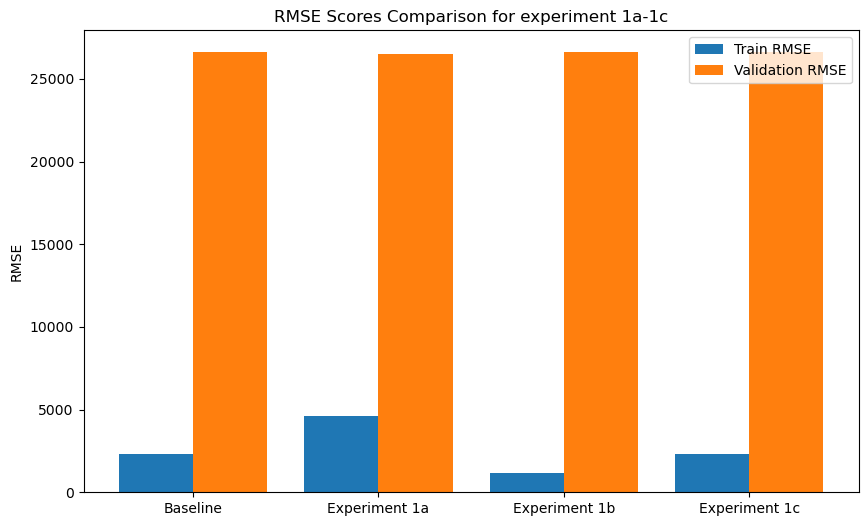

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


experiment_names = ['Baseline', 'Experiment 1a', 'Experiment 1b', 'Experiment 1c']
train_rmse_scores = []
val_rmse_scores = []

# Baseline Model
xgb_baseline = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    n_estimators=200,
    min_child_weight=2,
    subsample=1,
    colsample_bytree=0.8,
    reg_lambda=0.45,
    reg_alpha=0,
    gamma=0.5,
    random_state=42
)
xgb_baseline.fit(X_train, y_train)
baseline_train_predictions = xgb_baseline.predict(X_train)
baseline_val_predictions = xgb_baseline.predict(X_val)
train_rmse_scores.append(mean_squared_error(y_train, baseline_train_predictions, squared=False))
val_rmse_scores.append(mean_squared_error(y_val, baseline_val_predictions, squared=False))

# Experiment 1a: Lower learning_rate
xgb_exp1 = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.05, 
    n_estimators=200,
    min_child_weight=2,
    subsample=1,
    colsample_bytree=0.8,
    reg_lambda=0.45,
    reg_alpha=0,
    gamma=0.5,
    random_state=42
)
xgb_exp1.fit(X_train, y_train)
exp1_train_predictions = xgb_exp1.predict(X_train)
exp1_val_predictions = xgb_exp1.predict(X_val)
train_rmse_scores.append(mean_squared_error(y_train, exp1_train_predictions, squared=False))
val_rmse_scores.append(mean_squared_error(y_val, exp1_val_predictions, squared=False))

# Experiment 1b: Increase n_estimators
xgb_exp2 = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    n_estimators=300, 
    min_child_weight=2,
    subsample=1,
    colsample_bytree=0.8,
    reg_lambda=0.45,
    reg_alpha=0,
    gamma=0.5,
    random_state=42
)
xgb_exp2.fit(X_train, y_train)
exp2_train_predictions = xgb_exp2.predict(X_train)
exp2_val_predictions = xgb_exp2.predict(X_val)
train_rmse_scores.append(mean_squared_error(y_train, exp2_train_predictions, squared=False))
val_rmse_scores.append(mean_squared_error(y_val, exp2_val_predictions, squared=False))

# Experiment 1c: Add max_depth
xgb_exp3 = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    n_estimators=200,
    max_depth=6, 
    min_child_weight=2,
    subsample=1,
    colsample_bytree=0.8,
    reg_lambda=0.45,
    reg_alpha=0,
    gamma=0.5,
    random_state=42
)
xgb_exp3.fit(X_train, y_train)
exp3_train_predictions = xgb_exp3.predict(X_train)
exp3_val_predictions = xgb_exp3.predict(X_val)
train_rmse_scores.append(mean_squared_error(y_train, exp3_train_predictions, squared=False))
val_rmse_scores.append(mean_squared_error(y_val, exp3_val_predictions, squared=False))


plt.figure(figsize=(10, 6))
x = range(len(experiment_names))
plt.bar(x, train_rmse_scores, width=0.4, label='Train RMSE', align='center')
plt.bar([i + 0.4 for i in x], val_rmse_scores, width=0.4, label='Validation RMSE', align='center')
plt.xticks([i + 0.2 for i in x], experiment_names)
plt.ylabel('RMSE')
plt.title('RMSE Scores Comparison for experiment 1a-1c')
plt.legend()
plt.show()


<h3>Experiment 2: Performance of Random Forest</h3>

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

rf_model.fit(X_train, y_train)

train_predictions_rf = rf_model.predict(X_train)

val_predictions_rf = rf_model.predict(X_val)


In [30]:
train_rmse_rf = mean_squared_error(y_train, train_predictions_rf) ** 0.5
print("Random Forest Training RMSE:", train_rmse_rf)

val_rmse_rf = mean_squared_error(y_val, val_predictions_rf) ** 0.5
print("Random Forest Validation/Test RMSE:", val_rmse_rf)

train_rmsle_rf = mean_squared_log_error(y_train, train_predictions_rf) ** 0.5
print("Random Forest Training RMSLE:", train_rmsle_rf)

val_rmsle_rf = mean_squared_log_error(y_val, val_predictions_rf) ** 0.5
print("Random Forest Validation/Test RMSLE:", val_rmsle_rf)


Random Forest Training RMSE: 12364.110533229454
Random Forest Validation/Test RMSE: 28958.30024576114
Random Forest Training RMSLE: 0.06837252760087058
Random Forest Validation/Test RMSLE: 0.15483111471085453


<h3>Experiment 3: Performance of LightGBM</h3>

In [32]:
%pip install lightgbm
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=10,
    min_child_weight=2,
    subsample=1,
    colsample_bytree=0.8,
    reg_lambda=0.45,
    reg_alpha=0,
    random_state=42
)

lgb_model.fit(X_train, y_train)

train_predictions_lgb = lgb_model.predict(X_train)

val_predictions_lgb = lgb_model.predict(X_val)

train_rmse_lgb = mean_squared_error(y_train, train_predictions_lgb) ** 0.5
print("LightGBM Training RMSE:", train_rmse_lgb)

val_rmse_lgb = mean_squared_error(y_val, val_predictions_lgb) ** 0.5
print("LightGBM Validation/Test RMSE:", val_rmse_lgb)

train_rmsle_lgb = mean_squared_log_error(y_train, train_predictions_lgb) ** 0.5
print("LightGBM Training RMSLE:", train_rmsle_lgb)

val_rmsle_lgb = mean_squared_log_error(y_val, val_predictions_lgb) ** 0.5
print("LightGBM Validation/Test RMSLE:", val_rmsle_lgb)


Note: you may need to restart the kernel to use updated packages.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3399
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 155
[LightGBM] [Info] Start training from score 181441.541952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

<h3>Visualizing and comparing the results</h3>

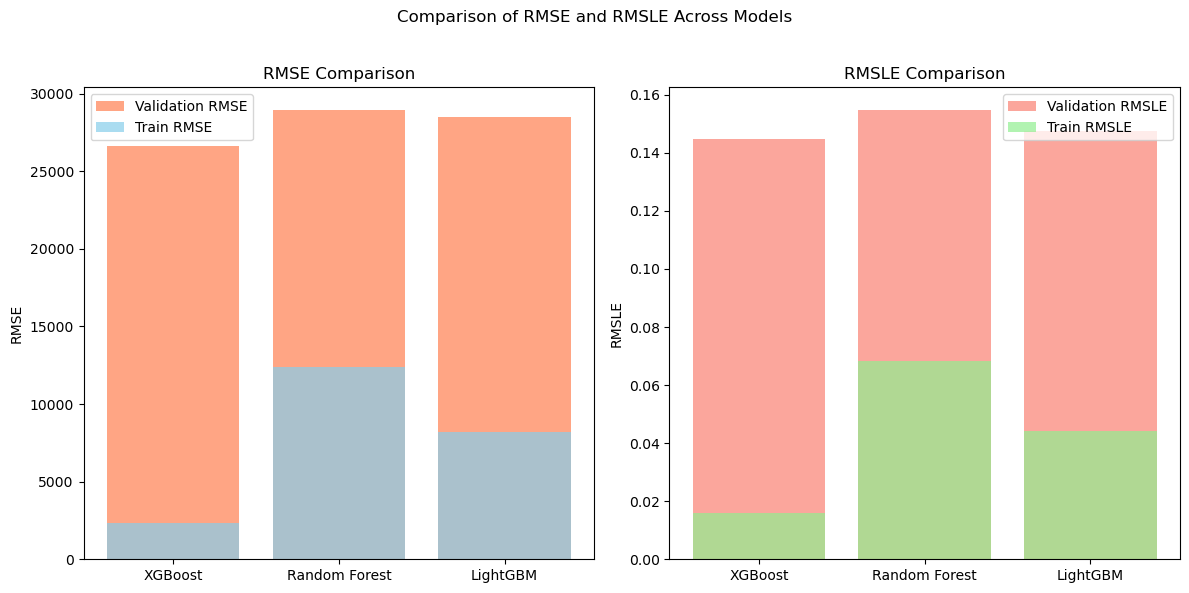

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

metrics = {
    "Model": ["XGBoost", "Random Forest", "LightGBM"],
    "Train RMSE": [train_rmse, train_rmse_rf, train_rmse_lgb],
    "Validation RMSE": [val_rmse, val_rmse_rf, val_rmse_lgb],
    "Train RMSLE": [train_rmsle, train_rmsle_rf, train_rmsle_lgb],
    "Validation RMSLE": [val_rmsle, val_rmsle_rf, val_rmsle_lgb]
}

metrics_df = pd.DataFrame(metrics)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Comparison of RMSE and RMSLE Across Models")

axes[0].bar(metrics_df["Model"], metrics_df["Validation RMSE"], label="Validation RMSE", color='coral', alpha=0.7)
axes[0].bar(metrics_df["Model"], metrics_df["Train RMSE"], label="Train RMSE", color='skyblue', alpha=0.7)
axes[0].set_ylabel("RMSE")
axes[0].set_title("RMSE Comparison")
axes[0].legend()

axes[1].bar(metrics_df["Model"], metrics_df["Validation RMSLE"], label="Validation RMSLE", color='salmon', alpha=0.7)
axes[1].bar(metrics_df["Model"], metrics_df["Train RMSLE"], label="Train RMSLE", color='lightgreen', alpha=0.7)
axes[1].set_ylabel("RMSLE")
axes[1].set_title("RMSLE Comparison")
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


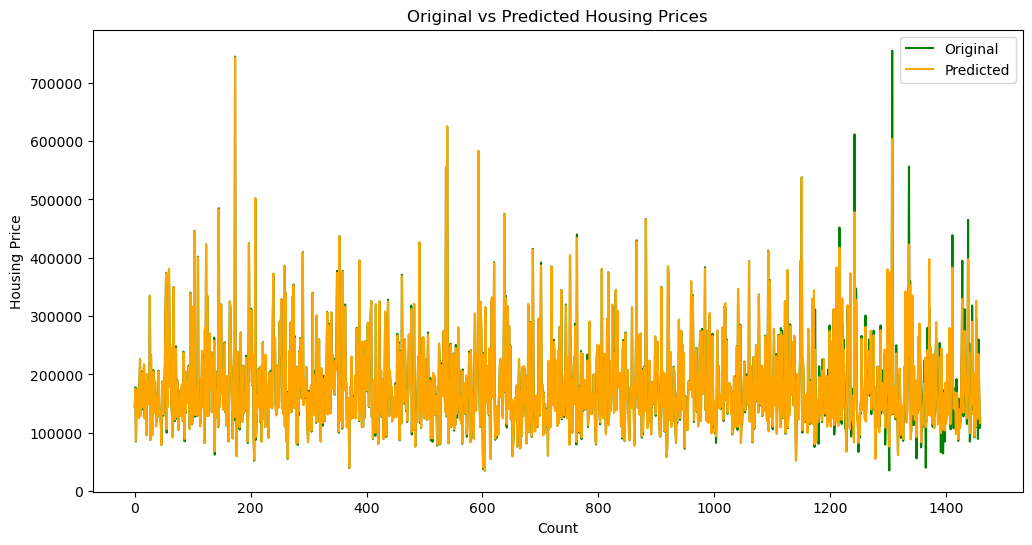

In [35]:
import matplotlib.pyplot as plt

y_original = list(y_train) + list(y_val)
y_predicted = list(train_predictions) + list(val_predictions)

plt.figure(figsize=(12, 6))

plt.plot(range(len(y_original)), y_original, label="Original", color="green")

plt.plot(range(len(y_predicted)), y_predicted, label="Predicted", color="orange", linestyle="-")

plt.xlabel("Count")
plt.ylabel("Housing Price")
plt.title("Original vs Predicted Housing Prices")
plt.legend()


plt.show()
